# Data Visualization Basics
Now that you have your environment running, we can do some stuff. We'll use this dataset:

[*2015 Flight Delays and Cancellations* provided by the U.S. Department of Transportation](https://www.kaggle.com/usdot/flight-delays). 

It is best to follow along with a running Jupyter environment - this can be local or on Azure Notebooks. It is also best to be running this on a cloned repo or library so that you'll also have the data accessible. 

**Note:** if on Azure notebooks - you would probably need to use a subset of the data because `flights.csv` may be too large for Azure to handle. In *Section 2*, run the other cell.

# 1. Import Modules and Data

In [1]:
%matplotlib inline

import pandas as pd # Panel data processing
import numpy as np # Library for numerical data
import matplotlib.pyplot as plt # Plots
import matplotlib 

# 2. Read Data from File

**We host this data on an S3 bucket, so it can take a while to download. You can choose to just download the file yourself and change the path.**

First we load our csv with `pd.read_csv()`, which is a very good csv parser. This returns a pandas `DataFrame` object, of which dimensions are accessible with `.shape`. 

`.head()` gives us a preview of our data- by showing the first 5 rows. 

In jupyter notebook, any variable called on the last line is automatically printed, so there's no need to call `print(flights.head())`.

### FOR LOCAL/Other

In [2]:
flights = pd.read_csv('flights.csv') 
# https://s3.amazonaws.com/vandyhacks/datascience/flights/flights.csv
# Load the csv from our s3 bucket
# This might take a while since the file is about 500mb big (in future just download onto computer)

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1])) 
flights.head()

C:\Users\kenny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dimensions: 5819079 rows, 31 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
flights.shape

(5819079, 31)

In [41]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

## ALL notebooks run from here down

In [3]:
airlines = pd.read_csv('https://s3.amazonaws.com/vandyhacks/datascience/flights/airlines.csv')
airlines.head() 

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


# 3. Remove Columns with Empty Values

In [4]:
flights = flights.dropna(axis=1, thresh= 0.8 * flights.shape[0]) # Drop any columns containing NaN, but keep columns with at least 80% non-NA values

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1]))
flights.head()

Dimensions: 5819079 rows, 25 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


# 4. Add 'DATE' and 'TOTAL_DELAY' Columns

In [5]:
flights['TOTAL_DELAY'] = flights['DEPARTURE_DELAY'] + flights['ARRIVAL_DELAY']

In [6]:
flights.groupby(['DAY','AIRLINE']).mean()['TOTAL_DELAY'].sort_values()

DAY  AIRLINE
7    AS         -3.211459
25   AS         -2.952124
11   AS         -2.857953
27   AS         -2.192867
17   AS         -1.906577
5    HA         -1.831205
24   AS         -1.791295
17   HA         -1.718988
26   AS         -1.714856
30   HA         -1.047865
28   HA         -1.008026
6    HA         -0.931349
28   AS         -0.849570
22   AS         -0.488658
16   AS         -0.476174
29   HA         -0.445268
4    HA         -0.428628
8    AS         -0.359688
31   AS         -0.325631
27   HA         -0.317422
29   US         -0.311417
7    DL         -0.294863
9    AS         -0.259305
6    AS         -0.164435
5    AS         -0.137192
18   AS         -0.103084
20   HA          0.132306
4    AS          0.146588
10   AS          0.189554
23   AS          0.377828
                  ...    
11   F9         29.249059
2    F9         29.990780
20   NK         30.305709
28   NK         30.619098
8    UA         30.991848
16   NK         31.028411
22   NK         31.143720

In pandas, you can simply make a new column with assignment. For example:

```
df['a'] = df['b'] + df['c']
```
For every row of a DataFrame `df`, the value in col 'a' is the sum of values in columns 'b' and 'c' on the same row.

Also, you can access columns of a DataFrame like such. Autocomplete with tab works pretty well in Jupyter.

A `DateTime` object is another pandas object for holding date-time information. The `to_datetime` function is pretty flexible in converting Series, strings, and other items into DateTime objects.


The next piece of code is pretty nutty:

```flights.groupby('DATE').mean()``` returns a new DataFrame. This aggregates the entire `flights` DataFrame column-wise by taking the mean of each column grouped by matching values in the 'DATE' column. The grouped 'DATE' column is now the new index.

```pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY'])``` creates a DataFrame by basically subsetting the columns we specify. We can also do this by subsetting with a list:

```new_df = flights.groupby('DATE').mean()[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']]``` 

In [7]:
flights['DATE'] = pd.to_datetime(flights[['MONTH', 'DAY','YEAR']]) # We use a special case of to_datetime(): assemble the datetime by inferring from a DataFrame subset

In [8]:
flights['TOTAL_DELAY'] = flights['DEPARTURE_DELAY'].astype(float) + flights['ARRIVAL_DELAY'].astype(float) # Get total delay of flights

In [9]:
avg_delay_date = pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per day

In [10]:
avg_delay_date.sort_values(by='TOTAL_DELAY', ascending=False).head(10) # Show dates with highest average total delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
DATE,,,
2015-01-04,31.567859,31.975011,63.481589
2015-12-27,31.054942,28.204632,58.977168
2015-12-29,32.300155,26.297732,58.419655
2015-12-30,30.444736,26.174419,56.601697
2015-12-28,29.024812,24.505093,53.324382
2015-03-01,25.702983,25.896026,51.100200
2015-01-03,25.168419,25.461860,50.557076
2015-08-20,25.715046,24.012981,49.653439
2015-07-18,23.864630,21.889349,45.746877


In [11]:
avg_delay_airline = pd.DataFrame(flights.groupby('AIRLINE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per airline
avg_delay_airline.sort_values(by=['TOTAL_DELAY'], ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
AIRLINE,,,
NK,15.944766,14.471800,30.354900
F9,13.350858,12.504706,25.808059
UA,14.435441,5.431594,19.764650
B6,11.514353,6.677861,18.120328
MQ,10.125188,6.457873,16.425060
EV,8.715934,6.585379,15.200976
WN,10.581986,4.374964,14.892147
VX,9.022595,4.737706,13.731191
OO,7.801104,5.845652,13.581735


# More on data manipulation

**What are some insights we want? How do we change our data to get them?**

(array([2.099756e+06, 2.178202e+06, 8.304700e+05, 3.526040e+05,
        2.168350e+05, 2.945700e+04, 3.630000e+03, 1.872000e+03,
        8.120000e+02, 3.700000e+02]),
 array([  7. ,  75.3, 143.6, 211.9, 280.2, 348.5, 416.8, 485.1, 553.4,
        621.7, 690. ]),
 <a list of 10 Patch objects>)

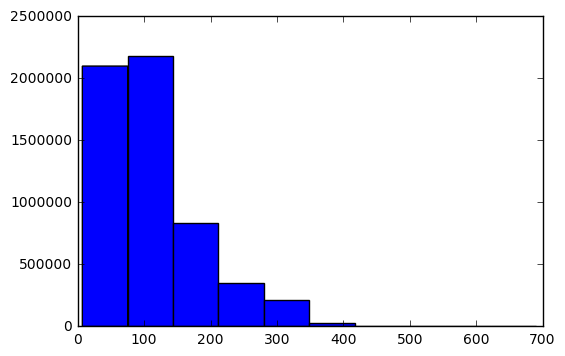

In [12]:
plt.hist(flights['AIR_TIME'].dropna())

Remember that we obtained the average total delay of flights for each day. Below, we can see what that dataframe looks like.

In [13]:
avg_delay_date

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
DATE,,,
2015-01-01,9.610897,5.352496,14.914513
2015-01-02,12.649745,9.838904,22.462445
2015-01-03,25.168419,25.461860,50.557076
2015-01-04,31.567859,31.975011,63.481589
2015-01-05,21.116838,18.811310,39.674505
2015-01-06,22.486405,21.299274,43.721430
2015-01-07,14.522800,11.955429,26.428187
2015-01-08,16.403728,13.316482,29.309733
2015-01-09,15.368482,12.255611,27.606166


But it's hard to glean any insights from staring at the numbers in the format. Not only are there too many days (rows) for us to see everything, but even if we could see everything it would be hard for us to observe trends, to measure changes in the delay over time.

A plot makes it much easier and quicker for us to spot possible trends. The following plot expresses the above dataframe

We can make a simple plot of our results to see which dates have had the highest average delay. We can play around with this by grouping by month to look at this a different way. The New-Years flights especially seem to be busy.

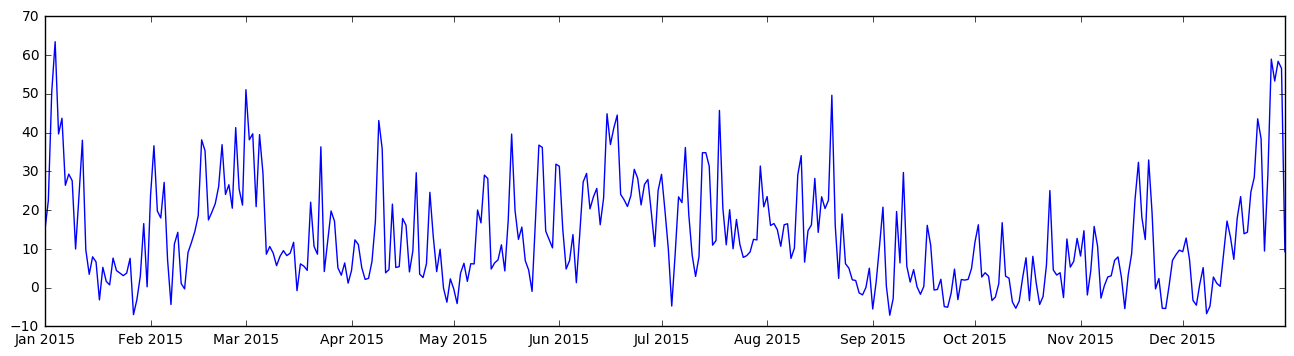

In [14]:
plt.figure(figsize=(16,4)) # Specifies the xize of the figure (optional line)
plt.plot(avg_delay_date.index, avg_delay_date['TOTAL_DELAY']) # Plotting by total_delay over dates

In addition to looking at the average length of delays, we can also look at the number of delays.

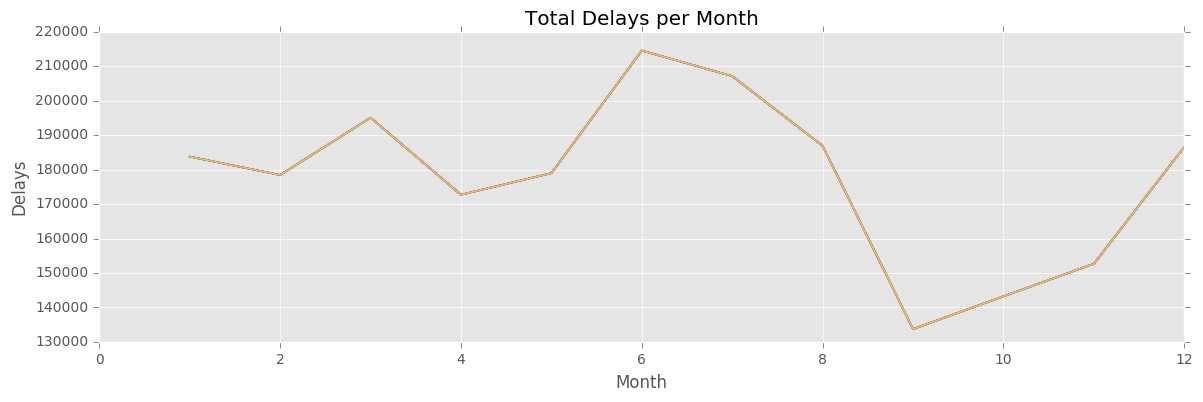

In [15]:
flights_delayed = flights[flights['TOTAL_DELAY'] > 0] # Filter using a boolean indexer 

matplotlib.style.use('ggplot') # Optional line
plt.figure(figsize=(14,4))
plt.plot(flights_delayed.groupby('MONTH').count()) # Group by COUNT, i.e. # number of flights each month that were delayed at all
plt.xlabel('Month', size = 12)
plt.ylabel('Delays', size = 12)
plt.title('Total Delays per Month')
#plt.show()   Show the graph (but if it's the last graph in a cell Jupyter automatically outputs it)

From the above plot, at first glance it looks like there were no delays in September. However, if we look at the y-axis, there were actually over 130,000 delays in September.

In order to avoid misleading the viewer, we should set the lower limit of the y axis to 0

(0, 220000.0)

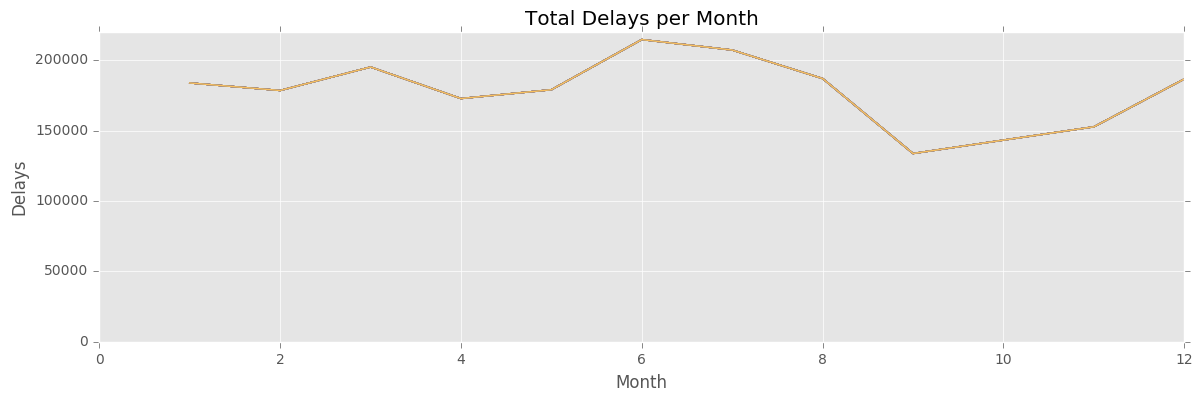

In [16]:
matplotlib.style.use('ggplot') # Optional line
plt.figure(figsize=(14,4))
plt.plot(flights_delayed.groupby('MONTH').count()) # Group by COUNT, i.e. # number of flights each month that were delayed at all
plt.xlabel('Month', size = 12)
plt.ylabel('Delays', size = 12)
plt.title('Total Delays per Month')
plt.ylim(bottom=0)

We can also consider by average day by airline rather than by time.

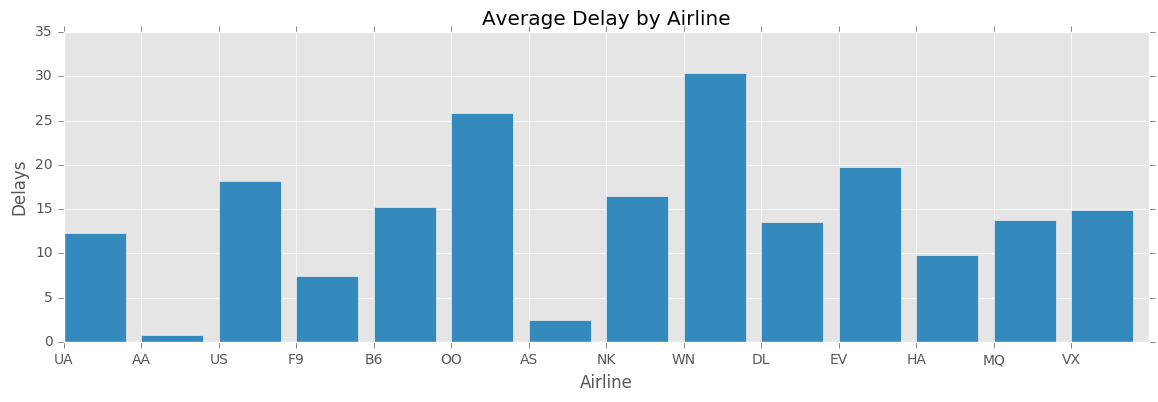

In [17]:
bins = np.arange(airlines.shape[0])

plt.figure(figsize=(14,4))
plt.bar(bins, avg_delay_airline['TOTAL_DELAY'].values)
plt.xlabel('Airline')
plt.xticks(bins, airlines['IATA_CODE'])
plt.ylabel('Delays')
plt.title('Average Delay by Airline')

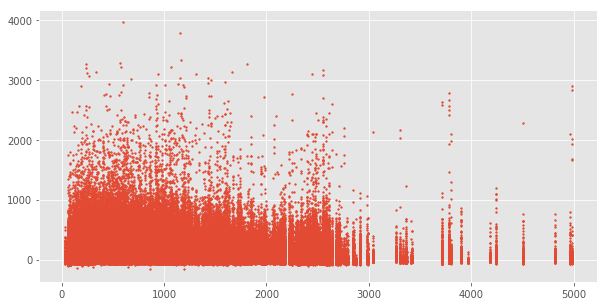

In [69]:
# Is delay time correlated with distance of the flight?
plt.figure(figsize=(10,5))
plt.scatter(flights['DISTANCE'], flights['TOTAL_DELAY'], s=3) # x= distance, y= delay

Let's go back to our data to see what else we would like to explore.

In [7]:
flights.shape

(5819079, 25)

In [50]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,TOTAL_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,1448,404.0,4.0,430,408.0,-22.0,0,0,-33.0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,2330,737.0,4.0,750,741.0,-9.0,0,0,-17.0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,2296,800.0,11.0,806,811.0,5.0,0,0,3.0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,2342,748.0,8.0,805,756.0,-9.0,0,0,-14.0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,1448,254.0,5.0,320,259.0,-21.0,0,0,-22.0,2015-01-01


In [52]:
flights.dtypes

YEAR                            int64
MONTH                           int64
DAY                             int64
DAY_OF_WEEK                     int64
AIRLINE                        object
FLIGHT_NUMBER                   int64
TAIL_NUMBER                    object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE             int64
DEPARTURE_TIME                float64
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
AIR_TIME                      float64
DISTANCE                        int64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL               int64
ARRIVAL_TIME                  float64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
TOTAL_DELAY                   float64
DATE        

In [7]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00


In [ ]:
`

Let's try generating a plot of min and max flight air time, over time.

## More visualizations
1. How do we see average flight distance by airline? Are some airlines more susceptible to delays because of long flights?
2. (bonus) show airline locations on a geographical map using an external package